<a href="https://colab.research.google.com/github/yub3r/CoderDataScience/blob/main/ProyectoDS-Crime_Data_2020_24-Millan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset - Departamento de Policía de Los Ángeles (LAPD)
Este conjunto de datos refleja incidentes delictivos en la ciudad de Los Ángeles que se remontan a 2020 - *para este estudio solo tendran en cuenta 10mil resgistros random*. Estos datos se transcriben de informes de delitos originales que se escriben en papel y, por lo tanto, puede haber algunas inexactitudes dentro de los datos. Algunos campos de ubicación con datos faltantes se indican como (0°, 0°). Los campos de dirección solo se proporcionan a la cuadra de cien más cercana para mantener la privacidad. Estos datos son tan precisos como los datos de la base de datos. Tenga en cuenta las preguntas o inquietudes en los comentarios.



Fuente Orginal
https://catalog.data.gov/dataset/crime-data-from-2020-to-present


Descripción de las columnas:
https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

In [114]:
# Import de Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install contextily
import contextily as ctx

sns.set_style("darkgrid")

In [ ]:
# Importamos el csv desde github
csv_url = "https://raw.githubusercontent.com/yub3r/CoderDataScience/refs/heads/main/Crime_Data_from_2020_10K2.csv"

#df_datacrime = pd.read_csv(csv_url, nrows=40)
df_datacrime = pd.read_csv(csv_url)

In [130]:
# Aquí se usa el argumento 'on_bad_lines' para saltar las líneas con errores.
#df_datacrime = pd.read_csv(csv_url, on_bad_lines='skip')

print("\nDataframe cargado desde CSV y Github/raw:\n")
print("(Rows, Cols) Totales")
print(df_datacrime.shape)

# df_datacrime.head(11)


Dataframe cargado desde CSV y Github/raw:

(Rows, Cols) Totales
(9999, 28)


In [129]:
# Conocemos algunos Stats de nuestro Dataframe
# df_datacrime.info()
# df_datacrime.describe()

In [ ]:
# Nombre de las columnas
print(f"\nNombres de Columnas: {df_datacrime.columns.to_list()} \n")

# Contamos los NaN por Columnas
# df_datacrime.isna().sum()
print(df_datacrime.isnull().sum())


Nombres de Columnas: ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT', 'LON'] 

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA                 0
AREA NAME            0
Rpt Dist No          0
Part 1-2             0
Crm Cd               0
Crm Cd Desc          0
Mocodes           1413
Vict Age             0
Vict Sex          1322
Vict Descent      1322
Premis Cd            0
Premis Desc          2
Weapon Used Cd    6513
Weapon Desc       6513
Status               0
Status Desc          0
Crm Cd 1             0
Crm Cd 2          9174
Crm Cd 3          9966
Crm Cd 4          9998
LOCATION             0
Cross Street      8426
LAT                  0
LON     

# Limpieza y conversiones
Luego de haber estudiado los resultados de consultas anteriores, procedemos a limpiar columnas que creemos innecesarias y dejamos solo los datos relevantes, para esto haremos una copia del dataset para la manipulación de datos.

Pasamos de tener 28 columnas a 18.


In [131]:
# Creamos una copia del dataset original para trabajar
df_crime = df_datacrime.copy()

# Columnas a eliminar
cols_para_drop = [
    'AREA', 'Rpt Dist No', 'Weapon Used Cd',
    'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
    'Cross Street', 'Crm Cd', 'Status'
]

# Eliminamos las columnas innecesarias
df_crime.drop(columns=cols_para_drop, inplace=True)

# Revisamos cómo quedó el DataFrame
df_crime.info()
df_crime.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DR_NO         9999 non-null   int64  
 1   Date Rptd     9999 non-null   object 
 2   DATE OCC      9999 non-null   object 
 3   TIME OCC      9999 non-null   int64  
 4   AREA NAME     9999 non-null   object 
 5   Part 1-2      9999 non-null   int64  
 6   Crm Cd Desc   9999 non-null   object 
 7   Mocodes       8586 non-null   object 
 8   Vict Age      9999 non-null   int64  
 9   Vict Sex      8677 non-null   object 
 10  Vict Descent  8677 non-null   object 
 11  Premis Cd     9999 non-null   int64  
 12  Premis Desc   9997 non-null   object 
 13  Weapon Desc   3486 non-null   object 
 14  Status Desc   9999 non-null   object 
 15  LOCATION      9999 non-null   object 
 16  LAT           9999 non-null   float64
 17  LON           9999 non-null   float64
dtypes: float64(2), int64(5), obj

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Part 1-2,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,N Hollywood,2,THEFT OF IDENTITY,0377,31,M,H,501,SINGLE FAMILY DWELLING,NaN,Invest Cont,7800 BEEMAN AV,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,N Hollywood,1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0334 2004 1822 1414 0305 0319 0400,32,M,H,102,SIDEWALK,KNIFE WITH BLADE 6INCHES OR LESS,Invest Cont,ATOLL AV,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,Van Nuys,2,THEFT OF IDENTITY,0377,30,M,W,501,SINGLE FAMILY DWELLING,NaN,Invest Cont,14600 SYLVAN ST,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,Wilshire,1,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344,47,F,A,101,STREET,NaN,Invest Cont,6000 COMEY AV,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,Pacific,1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1300 0344 1606 2032,63,M,H,103,ALLEY,NaN,Invest Cont,4700 LA VILLA MARINA,33.9813,-118.4350


In [133]:
# Convertimos las fechas/horas y nos quedamos solo con la fecha, sin hora la fija 12:00:00 AM.
df_crime['Date Rptd'] = pd.to_datetime(df_crime['Date Rptd'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce').dt.date
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce').dt.date

# Creamos nuevas columnas de tiempo a partir de DATE OCC para mejorar el analisis
df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
df_crime['month'] = pd.to_datetime(df_crime['DATE OCC']).dt.month
df_crime['day'] = pd.to_datetime(df_crime['DATE OCC']).dt.day
df_crime['day_of_week'] = pd.to_datetime(df_crime['DATE OCC']).dt.day_name()
df_crime["quarter"] = pd.to_datetime(df_crime["DATE OCC"]).dt.to_period("Q")

# Extraemos la hora real del delito desde TIME OCC y lo pasamos al formato 24hs
df_crime['hour'] = df_crime['TIME OCC'] // 100

# Normalizar valores nulos
df_crime['Vict Sex'] = df_crime['Vict Sex'].fillna('X')
df_crime['Vict Descent'] = df_crime['Vict Descent'].fillna('X')
df_crime['Premis Desc'] = df_crime['Premis Desc'].fillna('Unknown')
df_crime['Weapon Desc'] = df_crime['Weapon Desc'].fillna('Unknown')

# Revisamos el resultado
df_crime[['DATE OCC','year','month','day','day_of_week','hour', 'quarter', 'Weapon Desc']].head(100)
# print(df_crime.info())

,DATE OCC,year,month,day,day_of_week,hour,quarter,Weapon Desc
0,2020-11-07,2020,11,7,Saturday,8,2020Q4,Unknown
1,2020-10-18,2020,10,18,Sunday,18,2020Q4,KNIFE WITH BLADE 6INCHES OR LESS
2,2020-10-30,2020,10,30,Friday,12,2020Q4,Unknown
3,2020-12-24,2020,12,24,Thursday,13,2020Q4,Unknown
4,2020-09-29,2020,9,29,Tuesday,18,2020Q3,Unknown
...,...,...,...,...,...,...,...,...
95,2020-07-26,2020,7,26,Sunday,21,2020Q3,UNKNOWN WEAPON/OTHER WEAPON
96,2020-05-26,2020,5,26,Tuesday,21,2020Q2,Unknown
97,2020-10-31,2020,10,31,Saturday,13,2020Q4,Unknown
98,2020-05-23,2020,5,23,Saturday,16,2020Q2,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"


# HIPOTESIS Y GRAFICOS

### ¿Los delitos varían según la hora del día o el día de la semana?

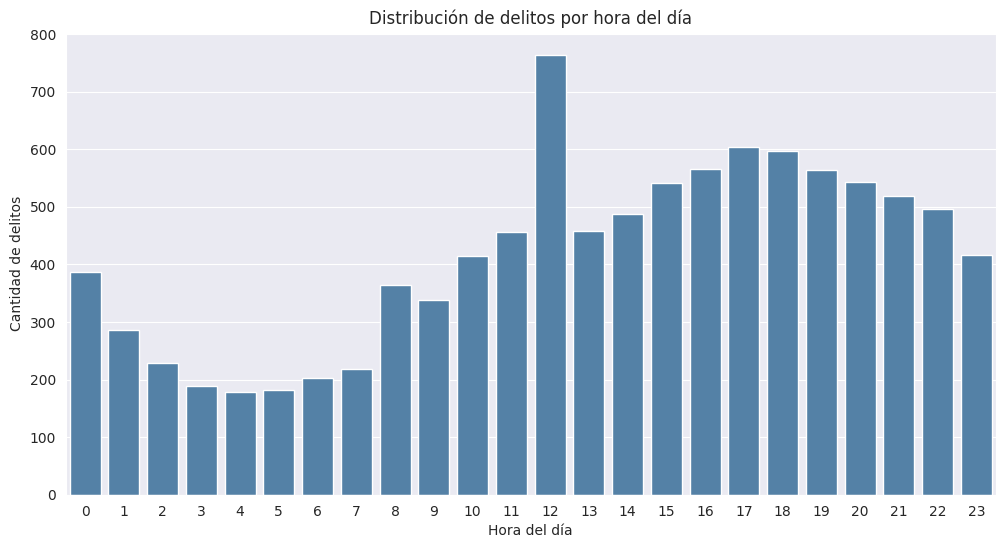

In [115]:
# Delitos por hora
plt.figure(figsize=(12,6))
sns.countplot(x="hour", data=df_crime, color="steelblue")
plt.title("Distribución de delitos por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de delitos")
plt.show()

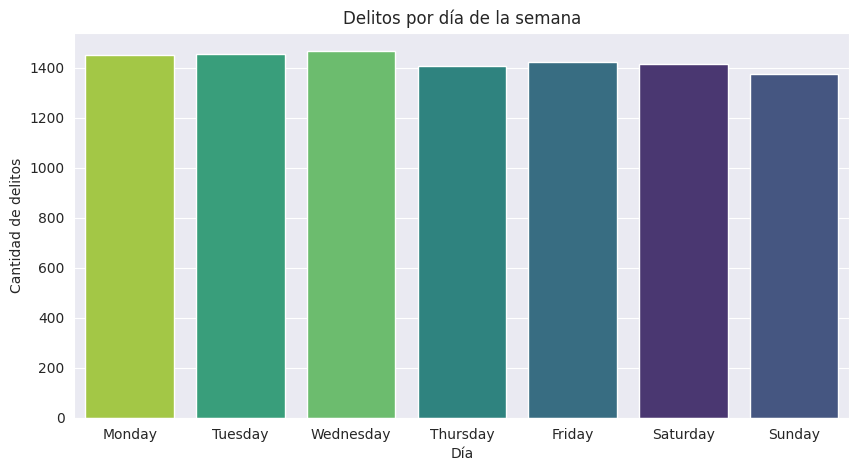

In [116]:
# Delitos por día de la semana
plt.figure(figsize=(10,5))
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(x="day_of_week", data=df_crime, order=order_days,  hue="day_of_week", palette="viridis", legend=False)
plt.title("Delitos por día de la semana")
plt.xlabel("Día")
plt.ylabel("Cantidad de delitos")
plt.show()

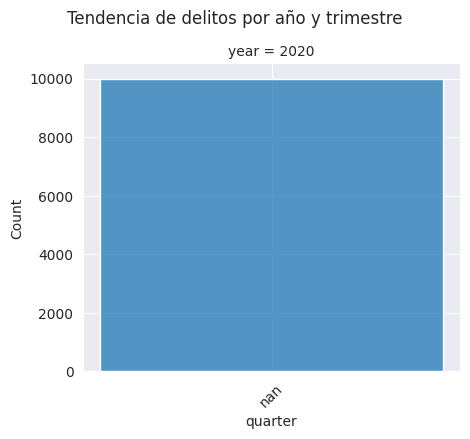

In [118]:
# Gráfico de densidad de delitos por trimestre y año
df_crime["quarter"] = pd.Categorical(df_crime["quarter"].astype(str))
sns.displot(
    data=df_crime,
    x="quarter",
    col="year",
    height=4,
    aspect=1.2,
    kde=False,
    bins=len(df_crime["quarter"].unique())
)
plt.xticks(rotation=45)
plt.suptitle("Tendencia de delitos por año y trimestre", y=1.05)
plt.show()

### ¿Algunas áreas de Los Ángeles presentan más delitos que otras?

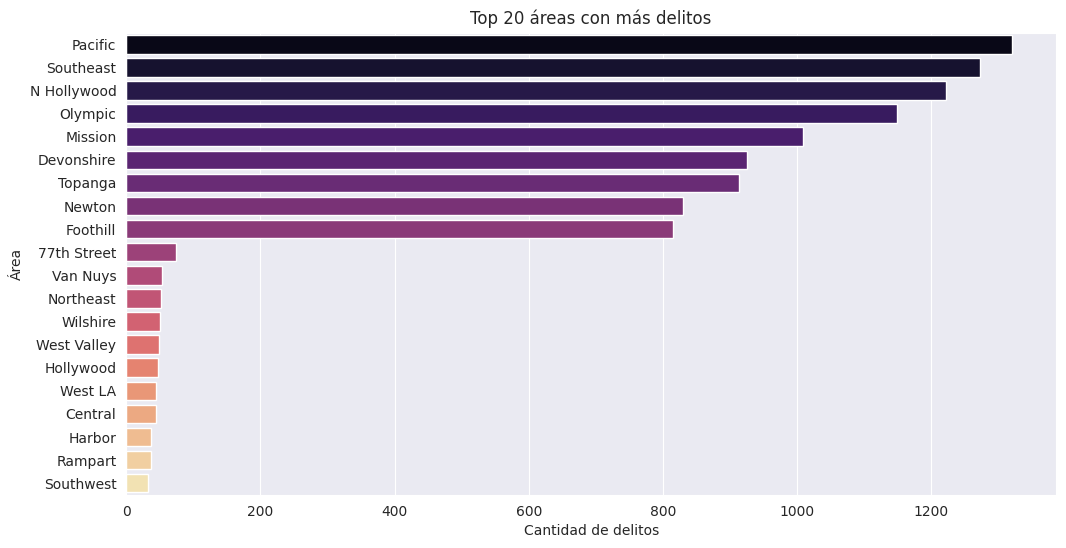

In [119]:
# Top 20 áreas con más delitos
plt.figure(figsize=(12,6))
top_areas = df_crime["AREA NAME"].value_counts().head(20)
sns.barplot(x=top_areas.values, y=top_areas.index, hue=top_areas.index, palette="magma", legend=False)
plt.title("Top 20 áreas con más delitos")
plt.xlabel("Cantidad de delitos")
plt.ylabel("Área")
plt.show()

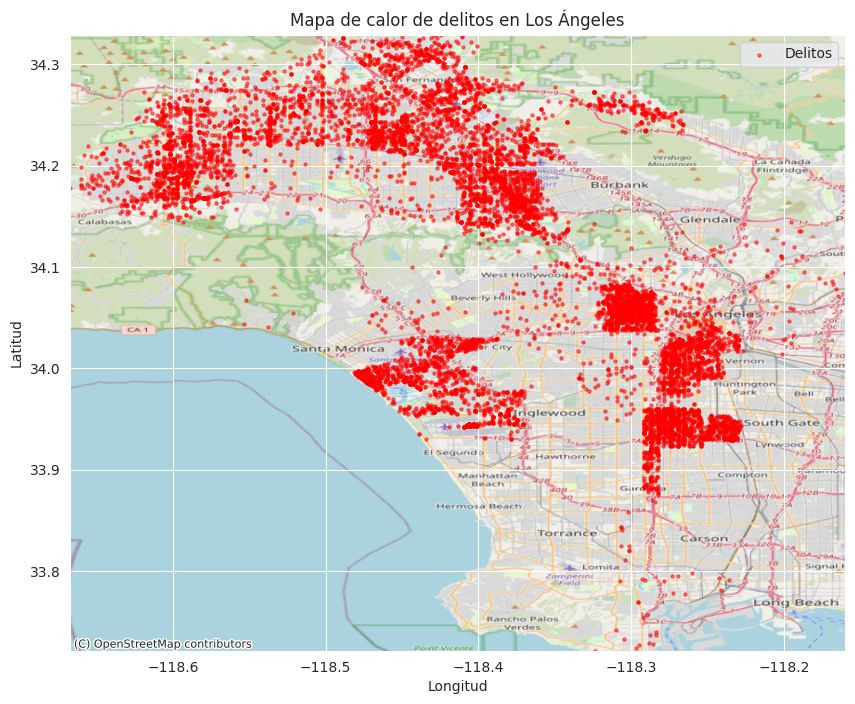

In [134]:
# Filtro para coordenadas válidas de Los Ángeles
df_map = df_crime[
    (df_crime["LAT"].between(33.5, 34.5)) &
    (df_crime["LON"].between(-119, -117))
]

# Gráfico de dispersión con mapa de fondo
plt.figure(figsize=(10, 8))
ax = plt.gca()


scatter = ax.scatter(
    df_map["LON"],
    df_map["LAT"],
    alpha=0.5,
    s=5,
    c="red",
    label="Delitos"
)

# Añadir mapa de fondo (usando OpenStreetMap)
ctx.add_basemap(
    ax,
    crs="EPSG:4326",  # Sistema de coordenadas WGS84 (lat/lon)
    source=ctx.providers.OpenStreetMap.Mapnik  # Fuente del mapa
)

# Ajustar límites del gráfico para que coincidan con los datos
ax.set_xlim(df_map["LON"].min(), df_map["LON"].max())
ax.set_ylim(df_map["LAT"].min(), df_map["LAT"].max())

plt.title("Mapa de calor de delitos en Los Ángeles")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.show()

### ¿Cuales delitos ocurren con más frecuencia?

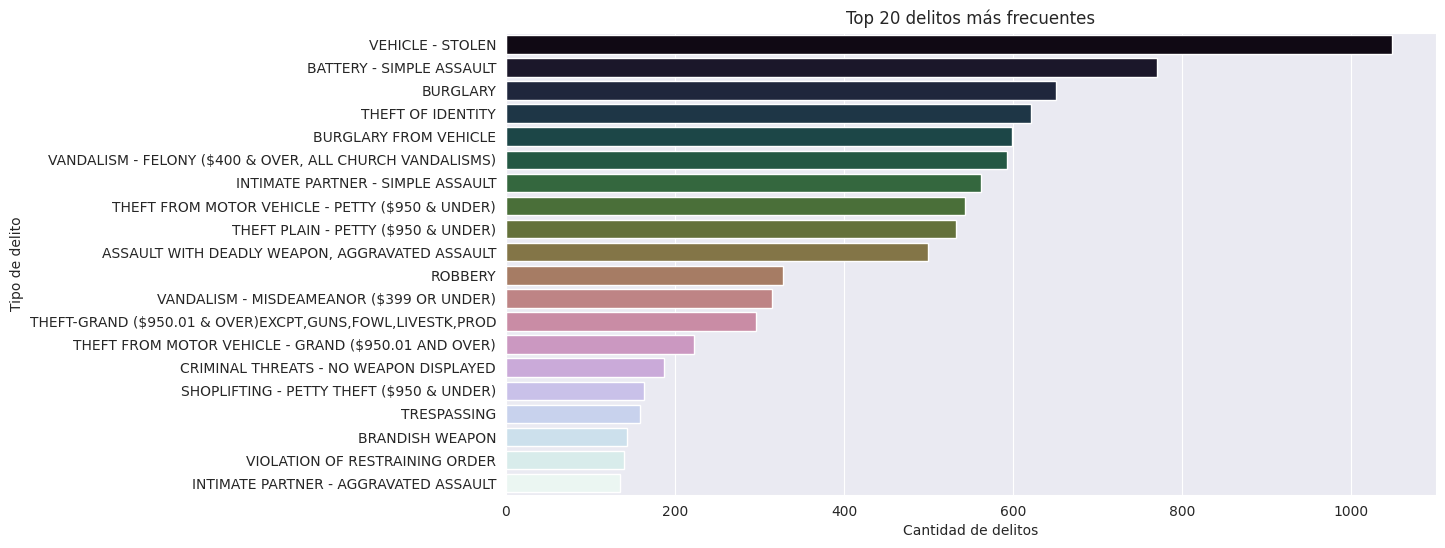

In [121]:
# Top 20 delitos más comunes
plt.figure(figsize=(12,6))
top_crimes = df_crime["Crm Cd Desc"].value_counts().head(20)
sns.barplot(x=top_crimes.values, y=top_crimes.index, hue=top_crimes.index, palette="cubehelix", legend=False)
plt.title("Top 20 delitos más frecuentes")
plt.xlabel("Cantidad de delitos")
plt.ylabel("Tipo de delito")
plt.show()

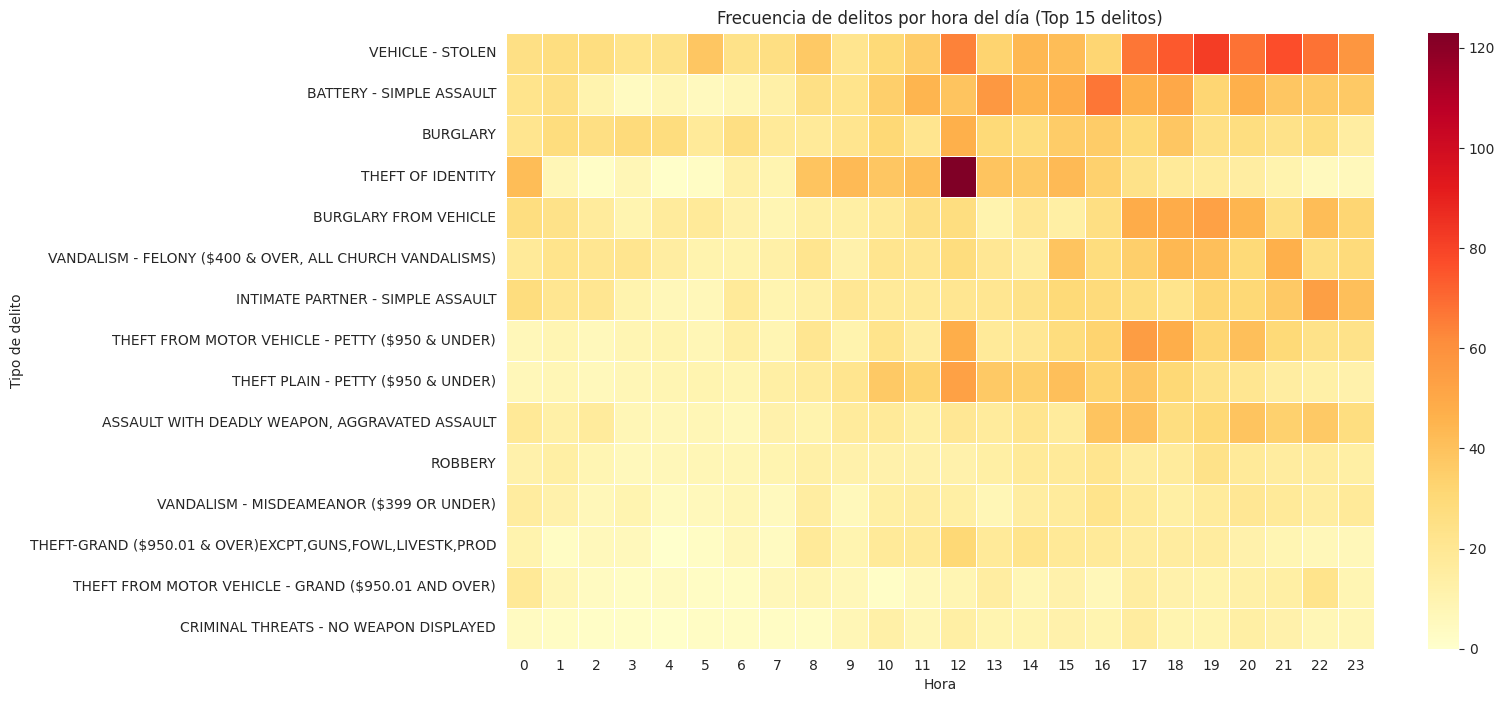

In [122]:
# Relación tipo de delito y hora (heatmap)
plt.figure(figsize=(14,8))
crime_hour = df_crime.groupby(["hour", "Crm Cd Desc"]).size().unstack(fill_value=0)
crime_hour_top = crime_hour[crime_hour.sum().sort_values(ascending=False).head(15).index]
sns.heatmap(crime_hour_top.T, cmap="YlOrRd", linewidths=.5)
plt.title("Frecuencia de delitos por hora del día (Top 15 delitos)")
plt.xlabel("Hora")
plt.ylabel("Tipo de delito")
plt.show()


### ¿La edad, el sexo y/o la descendencia influyen en la ocurrencia de delitos?

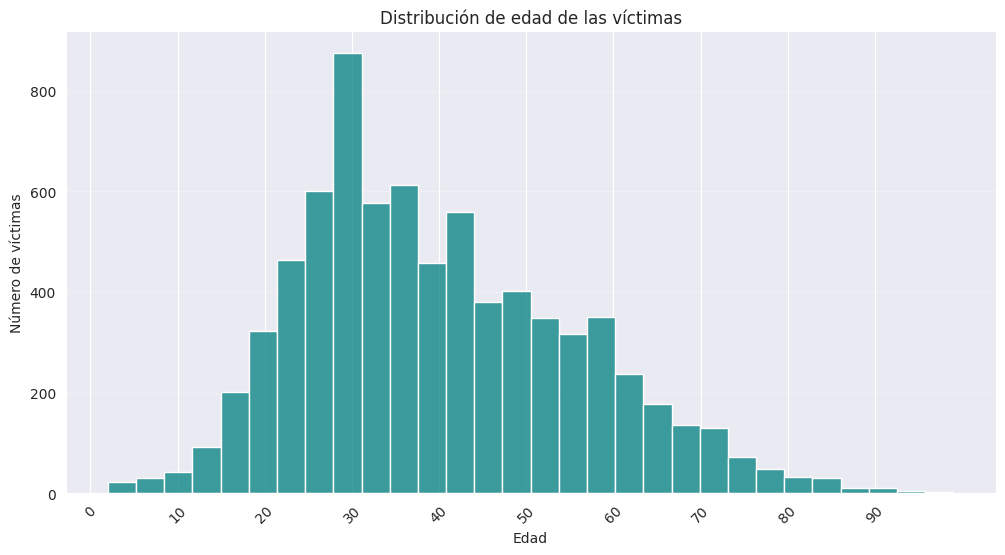

In [123]:
# Filtrar edades válidas (>0)
df_age = df_crime[df_crime["Vict Age"] > 0]

plt.figure(figsize=(12, 6))
ax = sns.histplot(df_age["Vict Age"], bins=30, kde=False, color="teal")

# Personalizar los ticks del eje x (de 10 en 10, por ejemplo)
plt.xticks(range(0, int(df_age["Vict Age"].max()) + 1, 10))  # Desde 0 hasta la edad máxima, en pasos de 10

# Rotar los labels para mejor legibilidad (opcional)
ax.set_xticklabels(ax.get_xticks(), rotation=45)

plt.title("Distribución de edad de las víctimas")
plt.xlabel("Edad")
plt.ylabel("Número de víctimas")
plt.grid(axis="y", alpha=0.3)  # Líneas de grid horizontales (opcional)
plt.show()

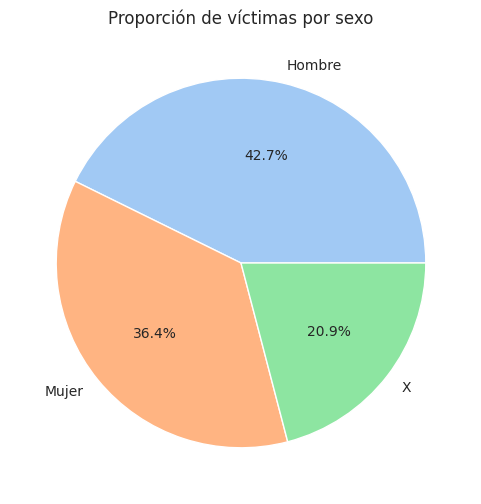

In [124]:
# Reemplazar etiquetas
df_crime["Vict Sex"] = df_crime["Vict Sex"].replace({"M": "Hombre", "F": "Mujer"})

# Contar y graficar
plt.figure(figsize=(6,6))
sex_counts = df_crime["Vict Sex"].value_counts()
plt.pie(
    sex_counts,
    labels=sex_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("pastel")
)
plt.title("Proporción de víctimas por sexo")
plt.show()

### ¿El uso de armas coincide con ciertos tipos de delitos?

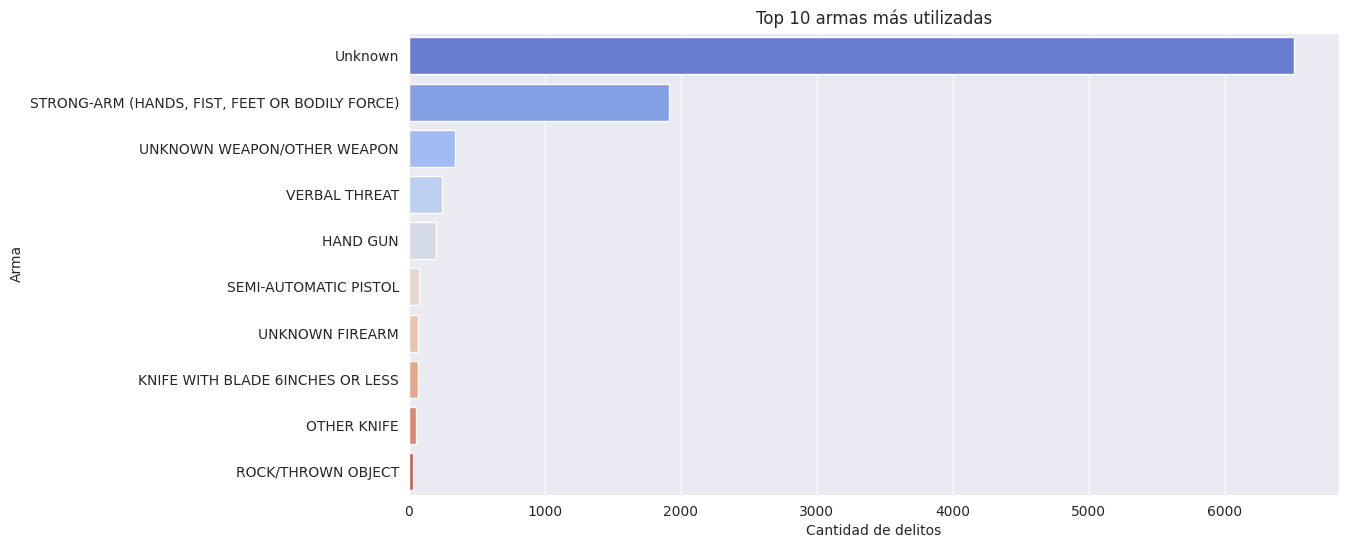

In [125]:
# Top 10 armas más usadas
plt.figure(figsize=(12,6))
top_weapons = df_crime["Weapon Desc"].value_counts().head(10)
sns.barplot(x=top_weapons.values, y=top_weapons.index, hue=top_weapons.index, palette="coolwarm", legend=False)
plt.title("Top 10 armas más utilizadas")
plt.xlabel("Cantidad de delitos")
plt.ylabel("Arma")
plt.show()

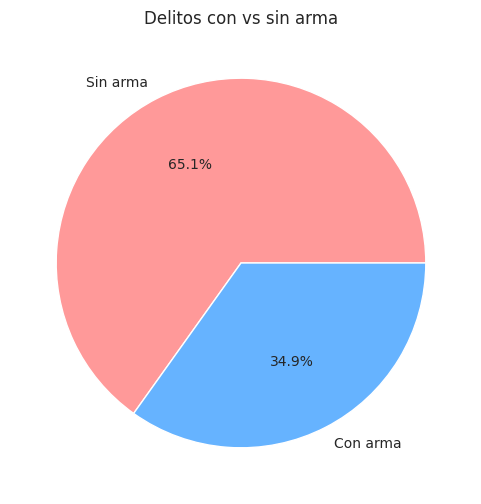

In [126]:
# Proporción de delitos con/sin arma
plt.figure(figsize=(6,6))
weapon_usage = df_crime["Weapon Desc"].apply(lambda x: "Con arma" if x != "Unknown" else "Sin arma").value_counts()
plt.pie(weapon_usage, labels=weapon_usage.index, autopct='%1.1f%%', colors=["#ff9999","#66b3ff"])
plt.title("Delitos con vs sin arma")
plt.show()

### No todos los delitos tienen el mismo nivel de resolución.

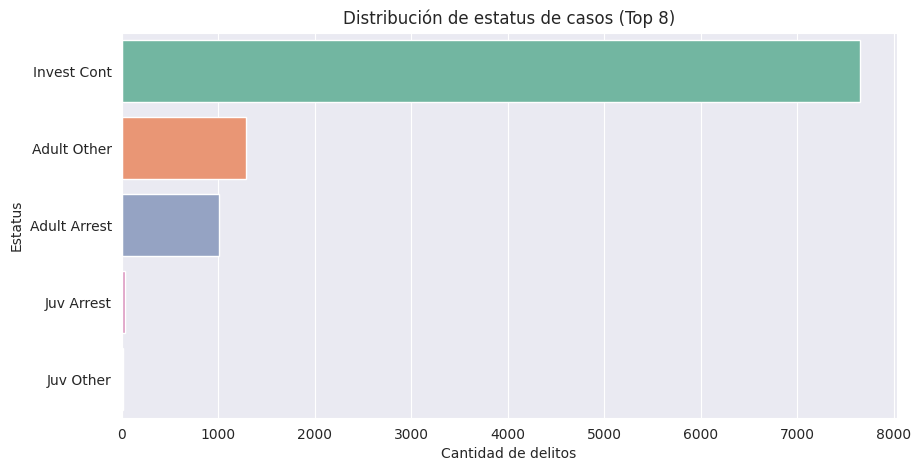

In [127]:
# Proporción de estados
plt.figure(figsize=(10,5))
status_counts = df_crime["Status Desc"].value_counts().head(8)
sns.barplot(x=status_counts.values, hue=status_counts.index, y=status_counts.index, palette="Set2", legend=False)
plt.title("Distribución de estatus de casos (Top 8)")
plt.xlabel("Cantidad de delitos")
plt.ylabel("Estatus")
plt.show()

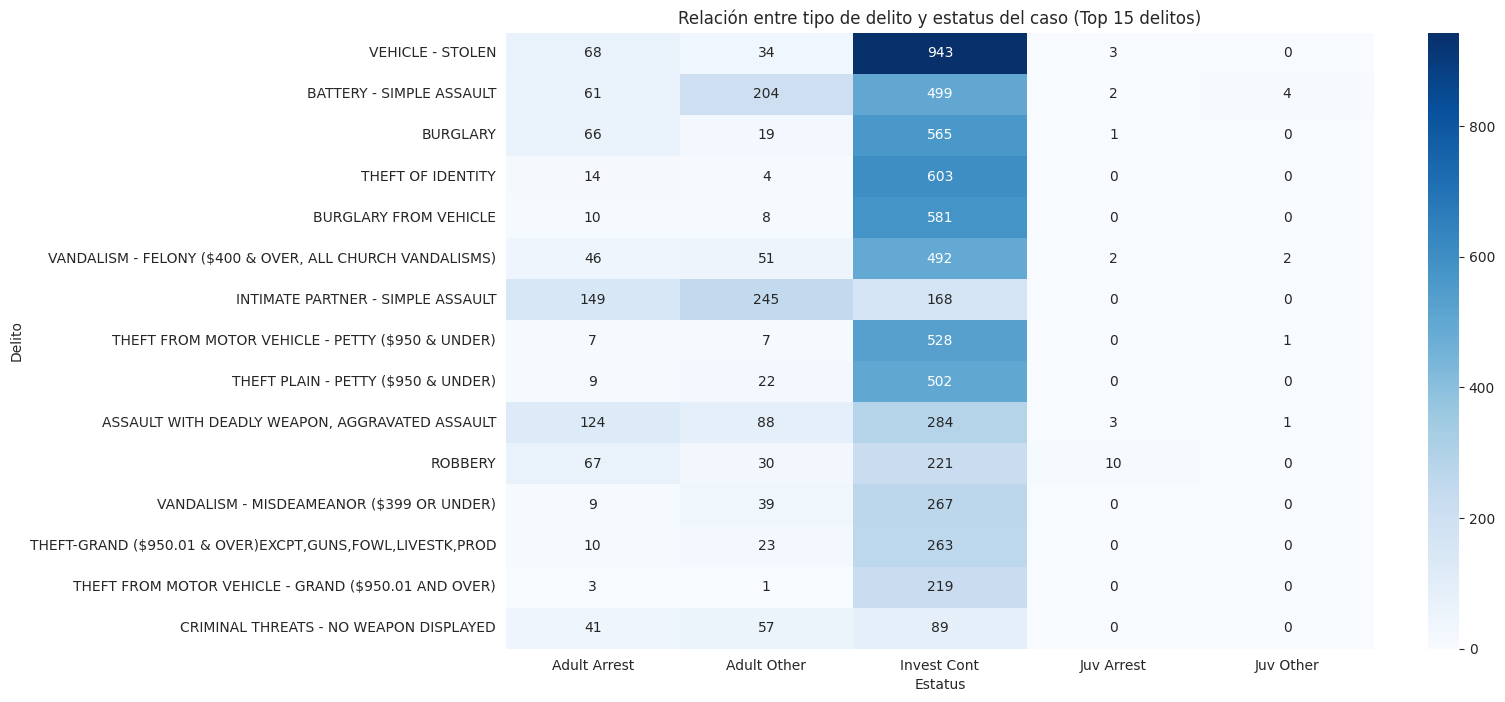

In [128]:
# Relación tipo de delito vs estatus (heatmap)
plt.figure(figsize=(14,8))
crime_status = df_crime.groupby(["Crm Cd Desc","Status Desc"]).size().unstack(fill_value=0)
crime_status_top = crime_status.loc[crime_status.sum(axis=1).sort_values(ascending=False).head(15).index]
sns.heatmap(crime_status_top, cmap="Blues", annot=True, fmt="d")
plt.title("Relación entre tipo de delito y estatus del caso (Top 15 delitos)")
plt.xlabel("Estatus")
plt.ylabel("Delito")
plt.show()